In [1]:
# CASE STUDY: 'the pumpkin market'

"""
you will find a .csv file in the root data folder called US-pumpkins.csv which includes 1757 lines of data 
about the market for pumpkins, sorted into groupings by city. 
This is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by 
the United States Department of Agriculture."""

'\nyou will find a .csv file in the root data folder called US-pumpkins.csv which includes 1757 lines of data \nabout the market for pumpkins, sorted into groupings by city. \nThis is raw data extracted from the Specialty Crops Terminal Markets Standard Reports distributed by \nthe United States Department of Agriculture.'

In [3]:
import pandas as pd
pumpkins = pd.read_csv('pumpkin.csv')
# The followingn line shows an error as the column 'Package' has some rows with NaN values, to fix it
# pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

# To fix it, we use notna() to select only the rows with values before applying this filter
pumpkins = pumpkins[pumpkins['Package'].notna()]
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
print(pumpkins.shape)
pumpkins.head()

(409, 26)


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
# Check if the are missing data in the current dataframe
pumpkins.isnull().sum()

City Name            0
Type               400
Package              0
Variety              0
Sub Variety        167
Grade              409
Date                 0
Low Price            0
High Price           0
Mostly Low          18
Mostly High         18
Origin               0
Origin District    392
Item Size          108
Color              145
Environment        409
Unit of Sale       398
Quality            409
Condition          409
Appearance         409
Storage            409
Crop               409
Repack               0
Trans Mode         409
Unnamed: 24        409
Unnamed: 25        391
dtype: int64

In [5]:
# To make your dataframe easier to work with, select only the columns you need, using the loc function 
# which extracts from the original dataframe a group of rows (passed as first parameter) and columns 
# (passed as second parameter). The expression : in the case below means "all rows".
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [8]:
#DETERMINE THE AVERAGE PRICE OF PUMPKIN

In [6]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=409)


In [7]:
# Copying converted data into a new Pandas dataframe
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


In [19]:
# Here it would be the regression model

In [29]:
# let's filter pumpkins by selecting only pumpkins with the string 'bushel' in their Package column.
# Add a filter at the top of the file, under the initial .csv import:
# pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [8]:
# You need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


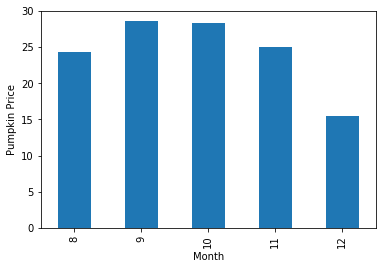

In [10]:
import matplotlib.pyplot as plt
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")
plt.show()